In [1]:
#Example from https://machinelearningmastery.com/implement-learning-vector-quantization-scratch-python/

from math import sqrt
from random import randrange
from random import seed

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [47]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
 
row0 = dataset[0]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


## Best Matching Unit

La BMU (meilleure correspondance) est le vecteur du codebook qui est le plus similaire à une nouvelle donnée.

Pour localiser la BMU d'une nouvelle donnée dans un ensemble de données, nous devons d'abord calculer la distance entre chaque vecteur du codebook et la nouvelle donnée. Nous pouvons le faire en utilisant notre fonction de distance ci-dessous.

Une fois les distances calculées, nous devons trier tous les codebooks par leur distance aux nouvelles données. Nous pouvons alors retourner le premier vecteur de codebook ou le plus similaire.

Nous pouvons le faire en gardant une trace de la distance pour chaque enregistrement dans l'ensemble de données comme un tuple, trier la liste des tuples par la distance (dans l'ordre décroissant) et ensuite récupérer le BMU.

Vous trouverez ci-dessous une fonction appelée **get_best_matching_unit()** qui met en œuvre cette méthode.


In [48]:
# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]

Vous pouvez voir que la fonction euclidean_distance() développée à l'étape précédente est utilisée pour calculer la distance entre chaque vecteur du codebook et test_row.

La liste des tuples du codebook et des distances est triée à l'aide d'une clé personnalisée qui garantit que le deuxième élément du tuple (tup[1]) est utilisé dans l'opération de tri.

Enfin, le vecteur de codebook le plus élevé ou le plus similaire est renvoyé comme BMU.

Nous pouvons tester cette fonction avec le petit ensemble de données artificielles préparé dans la section précédente.

L'exemple complet est présenté ci-dessous.

L'exécution de cet exemple imprime la BMU dans l'ensemble de données au premier enregistrement. Comme prévu, le premier enregistrement est le plus similaire à lui-même et se trouve en haut de la liste.

In [49]:
# Example: sorting using custom key
employees = [
    {'Name': 'Alan Turing', 'age': 25, 'salary': 10000},
    {'Name': 'Sharon Lin', 'age': 30, 'salary': 8000},
    {'Name': 'John Hopkins', 'age': 18, 'salary': 1000},
    {'Name': 'Mikhail Tal', 'age': 40, 'salary': 15000},
]

# sort by name (Ascending order)
employees.sort(key=lambda x: x.get('Name'))
print(employees, end='\n\n')

# sort by Age (Ascending order)
employees.sort(key=lambda x: x.get('age'))
print(employees, end='\n\n')

# sort by salary (Descending order)
employees.sort(key=lambda x: x.get('salary'), reverse=True)
print(employees, end='\n\n')

[{'Name': 'Alan Turing', 'age': 25, 'salary': 10000}, {'Name': 'John Hopkins', 'age': 18, 'salary': 1000}, {'Name': 'Mikhail Tal', 'age': 40, 'salary': 15000}, {'Name': 'Sharon Lin', 'age': 30, 'salary': 8000}]

[{'Name': 'John Hopkins', 'age': 18, 'salary': 1000}, {'Name': 'Alan Turing', 'age': 25, 'salary': 10000}, {'Name': 'Sharon Lin', 'age': 30, 'salary': 8000}, {'Name': 'Mikhail Tal', 'age': 40, 'salary': 15000}]

[{'Name': 'Mikhail Tal', 'age': 40, 'salary': 15000}, {'Name': 'Alan Turing', 'age': 25, 'salary': 10000}, {'Name': 'Sharon Lin', 'age': 30, 'salary': 8000}, {'Name': 'John Hopkins', 'age': 18, 'salary': 1000}]



**Key parameter**
We can also sort the iterable based on the function specified in the key parameter. It can be a Built-in function, a User-defined function, a Lambda function, a itemgetter, a attrgetter

In [50]:
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]
 
# Test best matching unit function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
test_row = dataset[0]
print(test_row)
bmu = get_best_matching_unit(dataset, test_row)
print(bmu)

[2.7810836, 2.550537003, 0]
[2.7810836, 2.550537003, 0]


Faire des prédictions avec un ensemble de vecteurs de codebook est la même chose.

Nous utilisons l'algorithme du voisin le plus proche. C'est-à-dire que pour chaque nouveau motif pour lequel nous souhaitons faire une prédiction,  nous localisons le vecteur codebook le plus similaire dans l'ensemble et nous retournons sa valeur de classe associée.

Maintenant que nous savons comment obtenir la meilleure unité de correspondance à partir d'un ensemble de vecteurs du codebook, nous devons apprendre à les former.

## Training Codebook Vectors

La première étape de la formation d'un ensemble de vecteurs du codebook consiste à initialiser l'ensemble.

Nous pouvons l'initialiser avec des modèles construits à partir de caractéristiques aléatoires dans l'ensemble de données d'apprentissage.

Vous trouverez ci-dessous une fonction nommée ***random_codebook()*** qui implémente cette opération. Des caractéristiques d'entrée et de sortie aléatoires sont sélectionnées dans les données d'apprentissage.

In [51]:
# Create a random codebook vector
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook

In [52]:
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

In [53]:
train=dataset

In [54]:
len(train)

10

In [55]:
len(train[0])

3

In [56]:
random_codebook(train)

[1.465489372, 2.759262235, 0]

In [57]:
random_codebook(train)

[2.7810836, 2.550537003, 1]

Après que les vecteurs du codebook aient été initialisés à un ensemble aléatoire, ils doivent être adaptés pour continuer au mieux l'apprentissage.

Ceci est fait de manière itérative.

**Epochs** : Au niveau supérieur, le processus est répété pour un nombre fixe d'époques ou et être exposées à des données d'apprentissage.

**Training Dataset** : Dans une époque, chaque modèle d'apprentissage est utilisé un par un pour mettre à jour l'ensemble des vecteurs du codebook.

**Pattern Features** : Pour un modèle d'apprentissage donné, chaque caractéristique d'un vecteur du codebook correspondant le mieux est mise à jour pour le rapprocher ou l'éloigner.

Une BMU est trouvée pour chaque modèle d'apprentissage et seule cette unité de meilleure correspondance est mise à jour. La différence entre le modèle d'apprentissage et l'unité de meilleure correspondance est calculée comme l'erreur. Les valeurs de classe (supposées être la dernière valeur de la liste) sont comparées. Si elles correspondent, l'erreur est ajoutée à la BMU pour la rapprocher du modèle d'apprentissage, sinon, elle est soustraite pour l'éloigner.

La quantité d'ajustement de la BMU est contrôlée par un taux d'apprentissage. Il s'agit d'une pondération de la quantité de changements apportés à toutes les BMU. Par exemple, un taux d'apprentissage de 0,3 signifie que les BMU ne sont déplacées que de 30 % de l'erreur ou de la différence entre les modèles de formation et les BMU.

En outre, le taux d'apprentissage est ajusté de manière à ce que son effet soit maximal lors de la première époque et diminue au fur et à mesure de la formation jusqu'à ce que son effet soit minimal lors de la dernière époque. C'est ce qu'on appelle un programme de taux d'apprentissage à décroissance linéaire, qui peut également être utilisé dans les réseaux neuronaux artificiels.

Nous pouvons résumer cette décroissance du taux d'apprentissage par numéro d'époque comme suit :

Nous pouvons tester cette équation en supposant un taux d'apprentissage de 0,3 et 10 époques. Le taux d'apprentissage à chaque époque serait le suivant :

In [58]:
# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
	codebooks = [random_codebook(train) for i in range(n_codebooks)]
	for epoch in range(epochs):
		rate = lrate * (1.0-(epoch/float(epochs)))
		sum_error = 0.0
		for row in train:
			bmu = get_best_matching_unit(codebooks, row)
			for i in range(len(row)-1):
				error = row[i] - bmu[i]
				sum_error += error**2
				if bmu[-1] == row[-1]:
					bmu[i] += rate * error
				else:
					bmu[i] -= rate * error
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
	return codebooks

In [59]:
1/float(10)

0.1

In [60]:
2/float(10)

0.2

In [61]:
# Test the training function
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
learn_rate = 0.3
n_epochs = 30
n_codebooks = 2
codebooks = train_codebooks(dataset, n_codebooks, learn_rate, n_epochs)
print('Codebooks: %s' % codebooks)

>epoch=0, lrate=0.300, error=43.270
>epoch=1, lrate=0.290, error=30.790
>epoch=2, lrate=0.280, error=28.166
>epoch=3, lrate=0.270, error=27.871
>epoch=4, lrate=0.260, error=27.609
>epoch=5, lrate=0.250, error=27.342
>epoch=6, lrate=0.240, error=27.075
>epoch=7, lrate=0.230, error=26.809
>epoch=8, lrate=0.220, error=26.546
>epoch=9, lrate=0.210, error=26.285
>epoch=10, lrate=0.200, error=26.026
>epoch=11, lrate=0.190, error=25.770
>epoch=12, lrate=0.180, error=25.515
>epoch=13, lrate=0.170, error=25.263
>epoch=14, lrate=0.160, error=25.012
>epoch=15, lrate=0.150, error=24.764
>epoch=16, lrate=0.140, error=24.519
>epoch=17, lrate=0.130, error=24.275
>epoch=18, lrate=0.120, error=24.034
>epoch=19, lrate=0.110, error=23.795
>epoch=20, lrate=0.100, error=23.558
>epoch=21, lrate=0.090, error=23.323
>epoch=22, lrate=0.080, error=23.091
>epoch=23, lrate=0.070, error=22.860
>epoch=24, lrate=0.060, error=22.633
>epoch=25, lrate=0.050, error=22.407
>epoch=26, lrate=0.040, error=22.183
>epoch=27, 

Text(0, 0.5, 'x2')

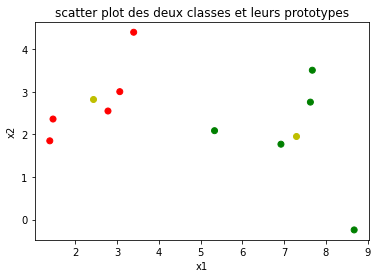

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline

colors = ['r','g','b']
plt.scatter([i[0] for i in codebooks],[j[1] for j in codebooks],c='y')
plt.scatter([i[0] for i in dataset],[j[1] for j in dataset],c=[colors[k[2]] for k in dataset])
plt.title("scatter plot des deux classes et leurs prototypes")
plt.xlabel("x1")
plt.ylabel("x2")

In [45]:
9/float(9)

1.0